# Automaçao da Malha Cartografica

In [27]:
from sources.importar import geofisico # Funçoes descritas no   1 - Geopandas: Creating Geodatabase.ipynb
from sources.importar import geologico # Funçoes descritas no   1 - Geopandas: Creating Geodatabase.ipynb
from sources.importar import gdb
from sources.plots import plot_base    # Funçoes definidas no   1.1 - Geapandas: Manipulating GeoDataFrames.ipynb

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
%matplotlib widget
from IPython.display import Image

## Com a funçao de produçao de grids da biblioteca GDAL disponibilzada pelo software livre QGIS foi possivel construir uma malha cartografica para as escalas de 1:25.000, 50.000, 100.000, 250.000 e 1.000.000 

## E a partir destas malhas cartograficas vamos setorizar o territorio continental brasileiro nomeando cada setor a partir do sistema de automatizaçao de folhas de cartas que utiliza os vertices da geometria retangular para nomear cada setor.  a biblioteca GeoPandas do primeiro grupo de JupyterNotebooks

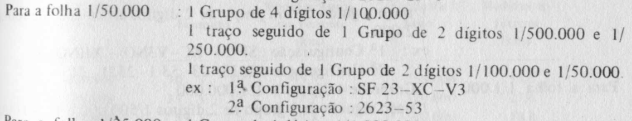

In [3]:
Image('imagens/art_folhas_50k.png')

In [4]:
from sources.contribuicoes.hilogoes.nomeador_hilo import nomeador_grid
# Esta funçao foi desenvolvida em conjunto com o aluno Hilo Goes do curso de Ciencias de Tecnologia da Universidade do Rio Grande do Norte
# Esta funçao apresenta erros para as folhas cartograficas da ZONAS NORTE, nomeando as folhas do hemisferio norte com ordem invertida.[espelhada]
# Para as folhas de 1kk sao descritos 24 zonas porem 24*4 resulta em 92. As coordenadas terminam em 84 Sul e 80 Norte. Sem projeçoes para os polos.

import math
import pandas as pd

# Nomeador de Grids ------------------------------------------------------------------------------------------#
def nomeador_grid(left,right,top,bottom,escala=5):
    e1kk = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'] 
    e500k = [['V','Y'],['X','Z']]
    e250k = [['A','C'],['B','D']]
    e100k = [['I','IV'],['II','V'],['III','VI']]
    e50k = [['1','3'],['2','4']]
    e25k = [['NW','SW'],['NE','SE']]

    if left > right:
        print('Oeste deve ser menor que leste')
    if top < bottom:
        print('Norte deve ser maior que Sul')
        
    # Para corrigir o erro de nomeaçao devemos adicionar um criterio caso a folha pertença ao N

    # id_folha
    # north
    # index
    # numero
    # lat_gap

    else:
        id_folha = ''
        if top <= 0:
            id_folha += 'S'                       # soma a letra S `a string 'id_folha'
            north = False                         # Indexador de folhas de Latitude Positiva
            index = math.floor(-top/4)            # Retorna o maior inteiro menor ou igual a x: {math.floor(x)}
        else:
            id_folha += 'N'                       
            north = True
            index = math.floor(bottom/4)
        
        numero    = math.ceil((180 + right) / 6)
        id_folha += e1kk[index] + str(numero)
        lat_gap   = abs(top - bottom)

        #p500k-----------------------
        if (lat_gap <= 2) & (escala >= 1):
            LO = math.ceil(right / 3) % 2 == 0
            NS = math.ceil(top/2) % 2 != north
            id_folha+='_'+e500k[LO][NS]

        #p250k-----------------------
        if (lat_gap<=1) & (escala>=2):
            LO = math.ceil(right/1.5) % 2 == 0
            NS = math.ceil(top) % 2 != north
            id_folha += e250k[LO][NS]

        #p100k-----------------------
        if (lat_gap <= 0.5) & (escala >= 3):
            LO = (math.ceil(right/0.5) % 3) - 1
            NS = math.ceil(top/0.5) % 2 != north
            id_folha += '_' + e100k[LO][NS]

        #p50k------------------------
        if (lat_gap <= 0.25) & (escala >= 4):
            LO = math.ceil(right/0.25) % 2 == 0
            NS = math.ceil(top/0.25) % 2 != north
            id_folha += e50k[LO][NS]

        #p25k------------------------
        if (lat_gap <= 0.125) & (escala >= 5):
            LO = math.ceil(right/0.125) % 2 == 0
            NS = math.ceil(top/0.125) % 2 != north
            id_folha += '_' + e25k[LO][NS]

        return id_folha

In [5]:
# Lendo cama vertorial gerada no QGIS com poligonos de 6º x 4º [Folhas em escala de 1:1.000.000]
malha_cartog_1kk = gpd.read_file(gdb+'cartografia/malha_cartog_1kk_wgs84.shp')
malha_cartog_1kk.head(5)

,id,left,top,right,bottom,geometry
0,4.0,-78.0,-4.0,-72.0,-8.0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000..."
1,5.0,-78.0,-8.0,-72.0,-12.0,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000..."
2,13.0,-72.0,4.0,-66.0,0.0,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000..."
3,14.0,-72.0,0.0,-66.0,-4.0,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000..."
4,15.0,-72.0,-4.0,-66.0,-8.0,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000..."


In [6]:
plots.plot_brazil(malha_cartog_1kk.boundary)
#labels(malha_cartog_1kk)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Definindo as regioes delimitadores para cada unidade da malha consturida no qgis Folha cartografica).

In [7]:
bounds = malha_cartog_1kk.bounds
bounds.head()

,minx,miny,maxx,maxy
0,-78.0,-8.0,-72.0,-4.0
1,-78.0,-12.0,-72.0,-8.0
2,-72.0,0.0,-66.0,4.0
3,-72.0,-4.0,-66.0,0.0
4,-72.0,-8.0,-66.0,-4.0


### Criando uma coluna region com os atributos retirados da funçao acima

In [8]:
malha_cartog_1kk['region'] = [(left,right,bottom,top) for\
                               left,right,bottom,top in zip(bounds['minx'],bounds['maxx'],
                                                            bounds['miny'],bounds['maxy'])]

In [9]:
# Indexando as folhas 1kk com função 'nomeador_grid()' descrita em './my_funcs.py' importado como 'mf'
df = pd.DataFrame(malha_cartog_1kk)
lista_grid = []
for index, row in df.iterrows():
    row['id_folha'] = (nomeador_grid(row.region[0],row.region[1],   
                                     row.region[3],row.region[2]))
    lista_grid.append(row.id_folha)

malha_cartog_1kk['id_folha'] = lista_grid
malha_cartog_1kk.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)

In [10]:
malha_cartog_1kk.head(5)

,geometry,id_folha
0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000...",SB18
1,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000...",SC18
2,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000...",NA19
3,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000...",SA19
4,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000...",SB19


In [11]:
# Adicionando a camada vetorial ao bando de dados geopackage.
malha_cartog_1kk.to_file(gdb+'geodatabase.gpkg',driver='GPKG',layer='malha_cartog_1kk_wgs84')

In [12]:
malha_cartog_1kk.head()

,geometry,id_folha
0,"POLYGON ((-78.00000 -4.00000, -72.00000 -4.000...",SB18
1,"POLYGON ((-78.00000 -8.00000, -72.00000 -8.000...",SC18
2,"POLYGON ((-72.00000 4.00000, -66.00000 4.00000...",NA19
3,"POLYGON ((-72.00000 0.00000, -66.00000 0.00000...",SA19
4,"POLYGON ((-72.00000 -4.00000, -66.00000 -4.000...",SB19


In [13]:
malha_cartog_1kk['centroid'] = malha_cartog_1kk.centroid

/tmp/ipykernel_8209/3010519588.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  malha_cartog_1kk['centroid'] = malha_cartog_1kk.centroid


In [14]:
c = malha_cartog_1kk

In [15]:
c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
c['coords'] = [coords[0] for coords in c['coords']]

In [16]:
malha_cartog_1kk['coords'] = c['coords']

In [17]:
plots.plot_brazil(malha_cartog_1kk.boundary)

for index, row in malha_cartog_1kk.iterrows():
    plt.annotate(s=row['id_folha'], xy=row['coords'],
                horizontalalignment='center')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_8209/1174551665.py:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['id_folha'], xy=row['coords'],


In [18]:
# Definindo Regions (W,E,S,N)
def regions(gdf):
    bounds = gdf.bounds 
    gdf['region'] = [(left,right,bottom,top) for left,right,bottom,top in zip(bounds['minx'],bounds['maxx'],
                                                                                bounds['miny'],bounds['maxy'])]

In [19]:
# Definindo nomes a partir da articulação sistematica de folhas de cartas. Construindo uma lista e definindo como uma series.
def nomeador_malha(gdf):
    df = pd.DataFrame(gdf)
    lista_grid = []
    for index, row in df.iterrows():
        row['id_folha'] = (nomeador_grid(row.region[0],row.region[1],
                                              row.region[3],row.region[2],escala=5))
        lista_grid.append(row.id_folha)

    gdf['id_folha'] = lista_grid

In [20]:
malha_cartog_25k = gpd.read_file(gdb+'cartografia/malha_cartog_25k_wgs84.shp')   # Escala de 1:25.000
malha_cartog_50k = gpd.read_file(gdb+'cartografia/malha_cartog_50k_wgs84.shp')   # Escala de 1:50.000
malha_cartog_100k = gpd.read_file(gdb+'cartografia/malha_cartog_100k_wgs84.shp') # Escala de 1:100.000

regions(malha_cartog_25k)
regions(malha_cartog_50k)
regions(malha_cartog_100k)

nomeador_malha(malha_cartog_25k)
nomeador_malha(malha_cartog_50k)
nomeador_malha(malha_cartog_100k)

# Percebe-se que há redundância no código, o que leva ao excesso de informação a ser escrita/lida e processada.

KeyboardInterrupt: 

In [ ]:
malha_cartog_50k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)
malha_cartog_25k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)
malha_cartog_100k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)

In [ ]:
malha_cartog_50k.to_file(gdb+'geodatabase.gpkg',driver='GPKG',layer='malha_cartog_50k_wgs84')
malha_cartog_25k.to_file(gdb+'geodatabase.gpkg',driver='GPKG',layer='malha_cartog_25k_wgs84')
malha_cartog_100k.to_file(gdb+'geodatabase.gpkg',driver='GPKG',layer='malha_cartog_100k_wgs84')

In [ ]:
malha_cartog_250k = gpd.read_file(gdb+'cartografia/malha_cartog_250k_wgs84.shp') # Escala de 1:250.000
regions(malha_cartog_250k)
nomeador_malha(malha_cartog_250k)
malha_cartog_250k.drop(['id','left','right','bottom','top','region'],axis=1,inplace=True)
malha_cartog_250k.to_file(gdb+'geodatabase.gpkg',driver='GPKG',layer='malha_cartog_250k_wgs84')

In [ ]:
malha_cartog_250k

,geometry,id_folha
0,"POLYGON ((-75.00000 -6.00000, -73.50000 -6.000...",SB18_Z_A
1,"POLYGON ((-75.00000 -7.00000, -73.50000 -7.000...",SB18_Z_C
2,"POLYGON ((-75.00000 -8.00000, -73.50000 -8.000...",SC18_X_A
3,"POLYGON ((-73.50000 -4.00000, -72.00000 -4.000...",SB18_X_B
4,"POLYGON ((-73.50000 -5.00000, -72.00000 -5.000...",SB18_X_D
...,...,...
555,"POLYGON ((-36.00000 -7.00000, -34.50000 -7.000...",SB25_Y_C
556,"POLYGON ((-36.00000 -8.00000, -34.50000 -8.000...",SC25_V_A
557,"POLYGON ((-36.00000 -9.00000, -34.50000 -9.000...",SC25_V_C
558,"POLYGON ((-36.00000 -10.00000, -34.50000 -10.0...",SC25_Y_A


### Construindo um selecionador de area a partir dos id das folhas cartograficas.

In [21]:
def select_area(escala,id):
    malha_cartog = importar.geologico('malha_cartog_'+escala+'_wgs84')
    regions(malha_cartog)
    area = (malha_cartog[malha_cartog['id_folha'].str.contains(id)])
    return(area)

In [22]:
def labels(gdf):
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]

    for index, row in gdf.iterrows():
        plt.annotate(s=row['id_folha'], xy=row['coords'],horizontalalignment='center')

In [23]:
area = select_area('25k','SC23_Z_A_IV')

In [26]:
plot_base(area.boundary,atributo=None,camada='litologia_100k',mapa='Rio Paraim')
labels(area)

NameError: name 'plot_base' is not defined

In [ ]:
socorro = select_area('250K','SF23_Y')

In [ ]:
socorro.boundary.plot()
labels(socorro)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/tmp/ipykernel_2993/3866263954.py:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['id_folha'], xy=row['coords'],horizontalalignment='center')


In [ ]:
plot_base(socorro.boundary,atributo=None)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …